To initialize this project, we first import the necessary libraries in order to initialize, search, and show the findings in this dataset. 

In [1]:
import pandas as pd

Additionally, we must store the .csv file in an accesible manner, which, in this case, we are storing it in a Pandas Dataframe, which allows us to easily access the content of each column in the CSV file without having to perform major operations (such as, for example, initializing an MySQL Database).

In [2]:
file_path = 'DataSet.csv' 
df = pd.read_csv(file_path)


Our first hypothesis is to analyze whether or not there is a change in Fiction or Non Fiction trends throughout the years, meaning, whether or not there is a shift in popularity with respect to the genres

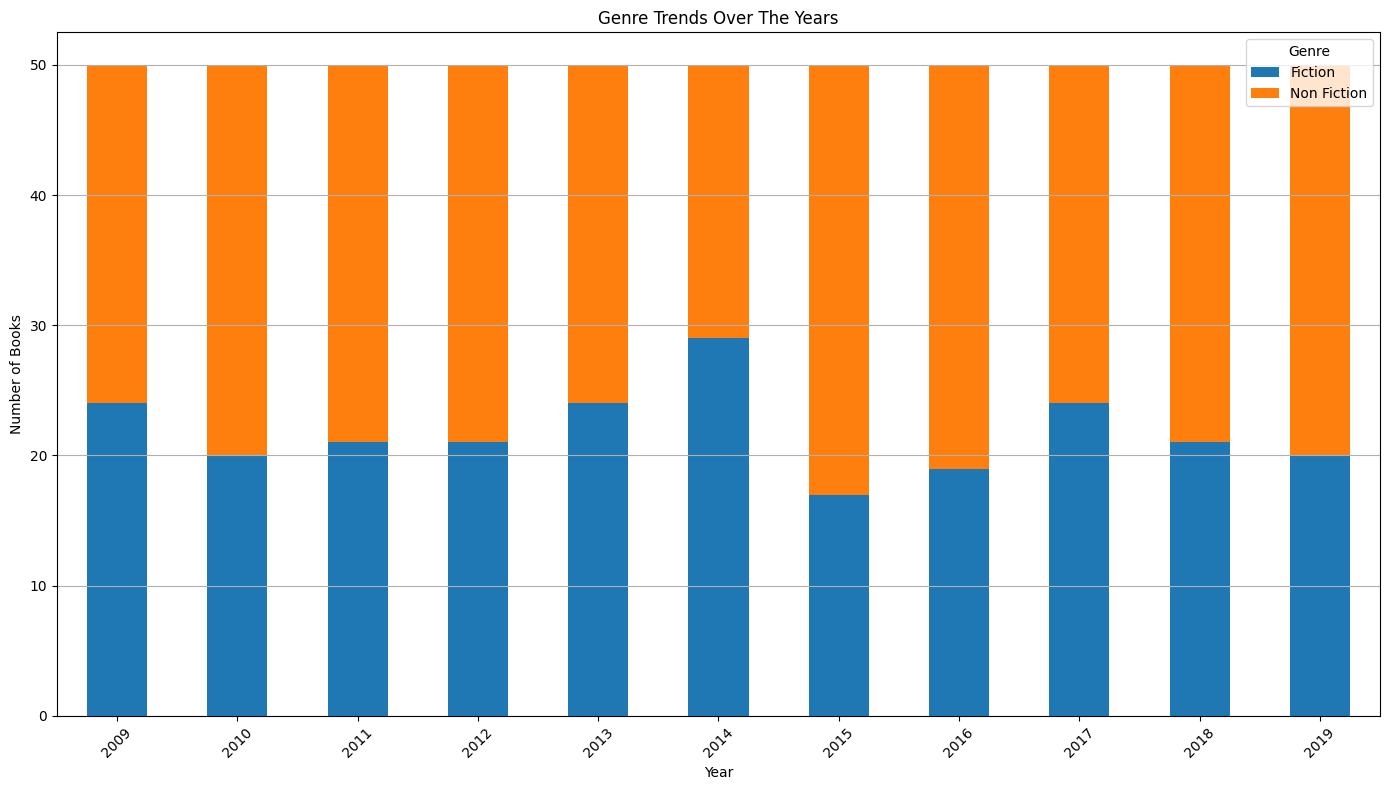

In [3]:
from FinalProjectCode import genre_trend_per_year
genre_trend_per_year(df)

The analysis demonstrates that overall the fluctuation of the genres, in general, remains stable, however, we can see a drastic jump between 2014 and 2015, where we see an increment by almost 10+ non-fiction books that made it onto Top 50. The books of the sort, which weren't in 2014's year, were the following:

In [4]:
from FinalProjectCode import which_books_top_50_but_not_last_year
current_year = 2015  
genre = 'Non Fiction'
new_books_in_genre = which_books_top_50_but_not_last_year(df, current_year, genre)
new_books_in_genre


,Name,Author,User Rating,Reviews,Price,Year,Genre
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
18,Adult Coloring Books: A Coloring Book for Adul...,Coloring Books for Adults,4.5,2426,8,2015,Non Fiction
23,American Sniper: The Autobiography of the Most...,Chris Kyle,4.6,15921,9,2015,Non Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
29,Balance (Angie's Extreme Stress Menders),Angie Grace,4.6,1909,11,2015,Non Fiction
34,Being Mortal: Medicine and What Matters in the...,Atul Gawande,4.8,11113,15,2015,Non Fiction
35,Between the World and Me,Ta-Nehisi Coates,4.7,10070,13,2015,Non Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction


Observing these trends, there is no specific genre that stands out, as there as psychological, thriller, action, and other sorts of book subgenres. The idea can lie behind the prices of the books, therefore, we can analyze the average price per book in 2015 and observe the sudden shift in the trend.

In [5]:
from FinalProjectCode import average_price_per_genre_between_years
start_year = 2014
end_year = 2015
average_prices = average_price_per_genre_between_years(df, start_year, end_year)
average_prices

Genre,Fiction,Non Fiction
Year,,
2014,10.172414,20.809524
2015,9.352941,10.969697


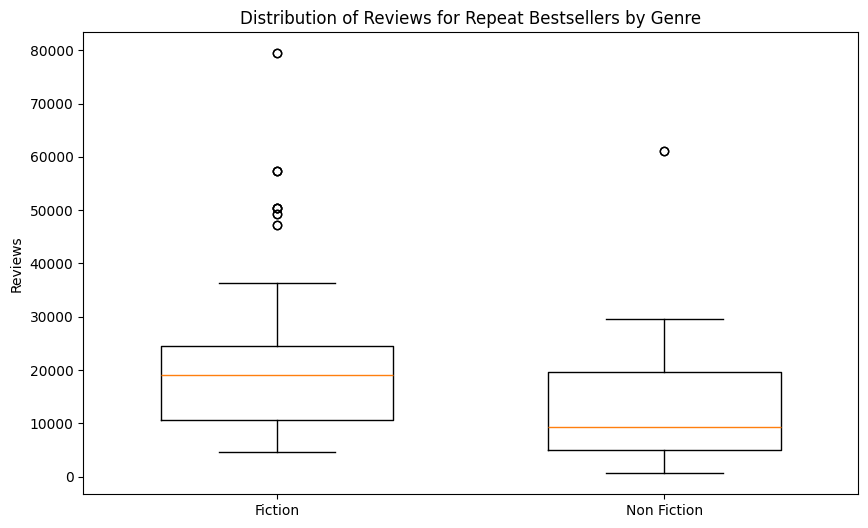

In [6]:
from FinalProjectCode import repeat_best_sellers
repeat_best_sellers_trend = repeat_best_sellers(df)
repeat_best_sellers_trend

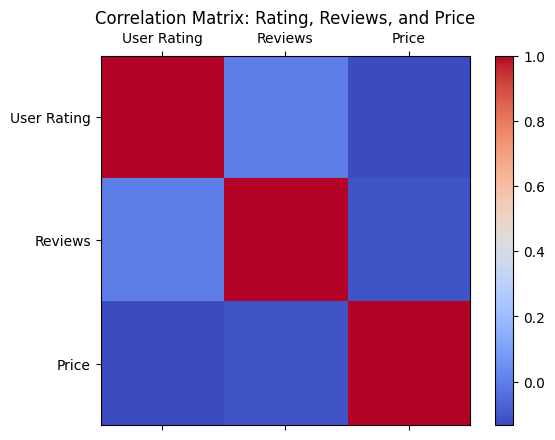

In [7]:
from FinalProjectCode import correlation_cost_reviews_rating
display = correlation_cost_reviews_rating(df)
display

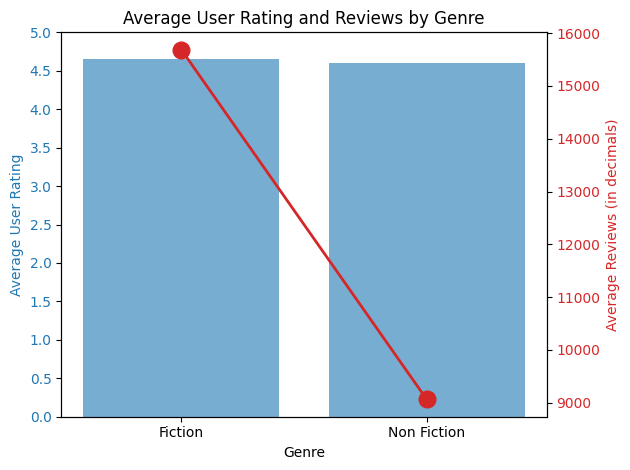

In [8]:
from FinalProjectCode import genre_performance_comparison
display = genre_performance_comparison(df)
display

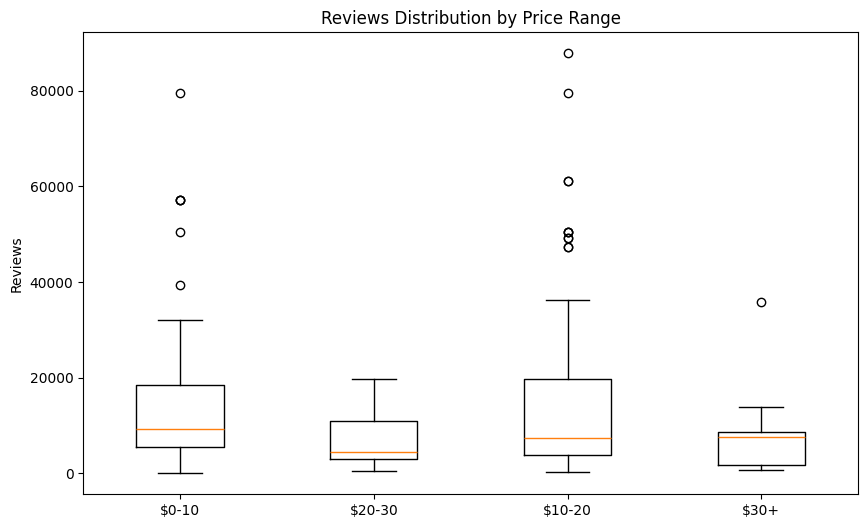

In [9]:
from FinalProjectCode import analysis_price_cultural_relevance
display = analysis_price_cultural_relevance(df)
display

This code analyzes the "retention rate" of books per year: how many books stay on the list.

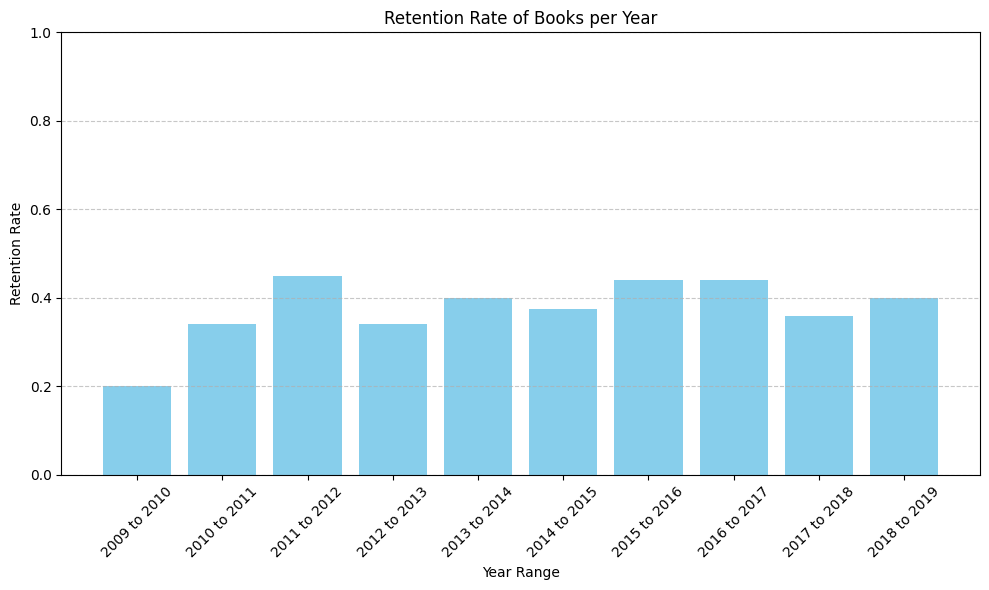

In [10]:
from FinalProjectCode import plot_retention_rate
plot_retention_rate(df)

This code disaggregates by genre: how many books retain spots on the best-seller list by genre.

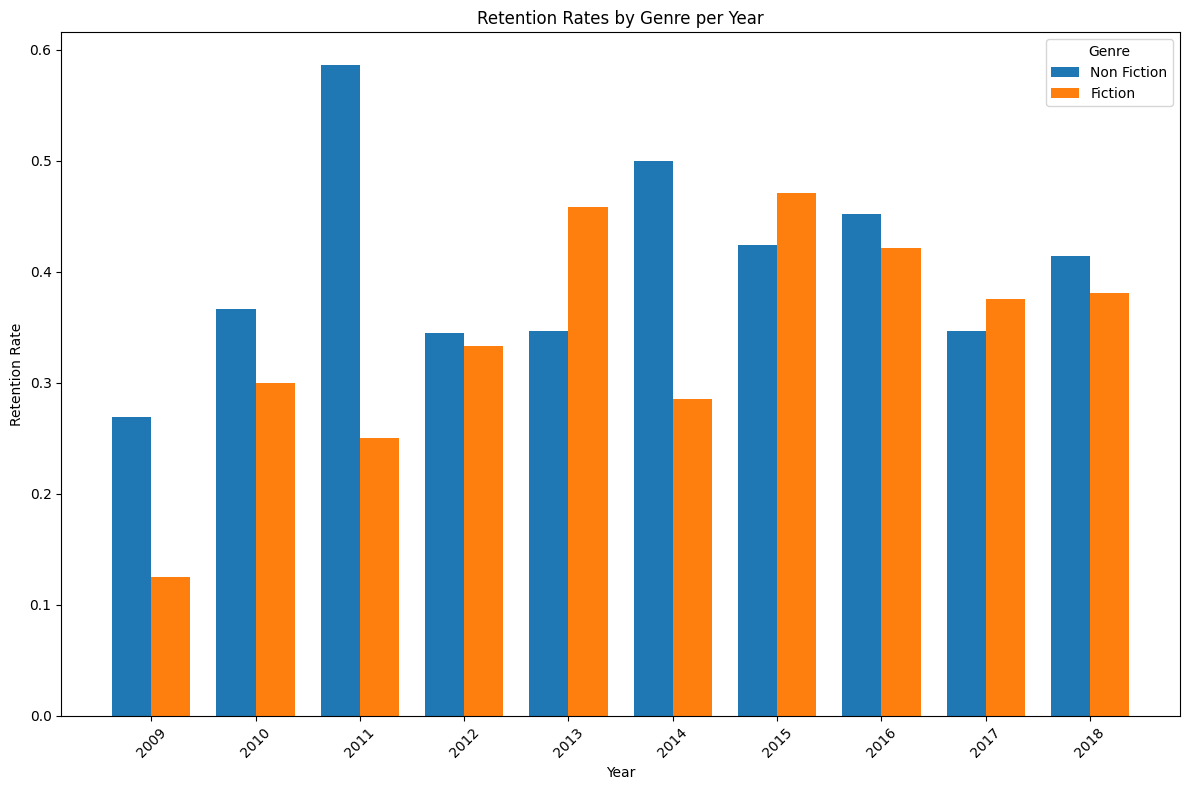

In [11]:
from FinalProjectCode import plot_retention_rate_by_criteria
plot_retention_rate_by_criteria(df)

Mirror the same thing but with rating

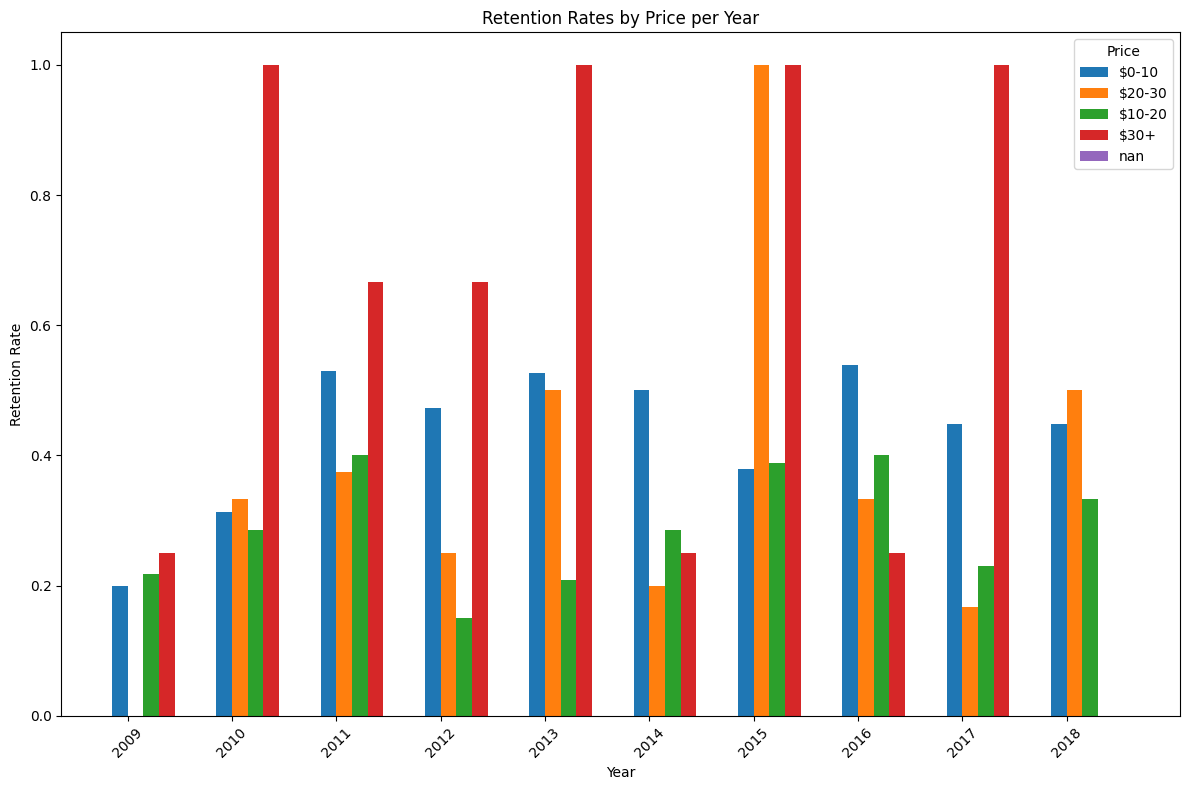

In [12]:
plot_retention_rate_by_criteria(df, 'Price', 'Price', to_cut = True) 

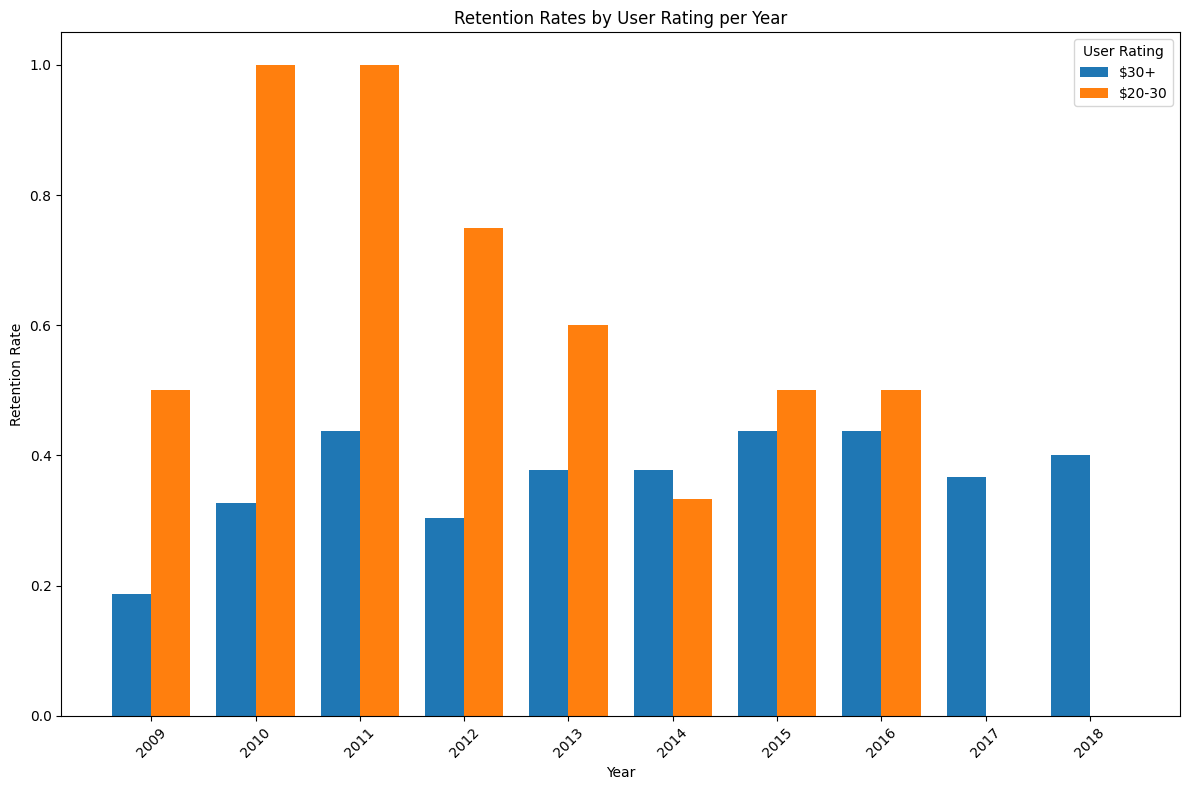

In [13]:
plot_retention_rate_by_criteria(df, 'User Rating', 'User Rating', cut_range=[1, 2, 3, 4, 5], cut_labels=['1-2', '2-3', '3-4', '4-5', '5'] to_cut = True) 